In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**box plot**

- box plot is used for detect outliers

- box plot has min q1 q2 q3 and max value

- Inside box plot red line represents median which 50 precent of the data

**outlier**

- very very huge observation

-  

In [ ]:
 code-block:: none

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

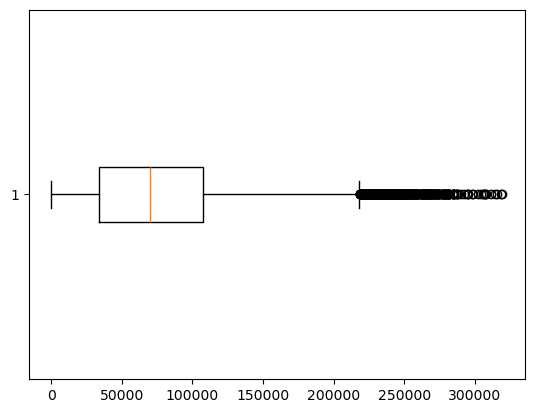

In [5]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

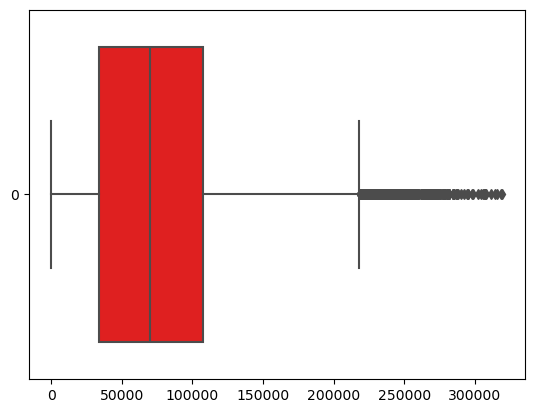

In [8]:
sns.boxplot(visa_df['prevailing_wage'],orient='h',color='red')

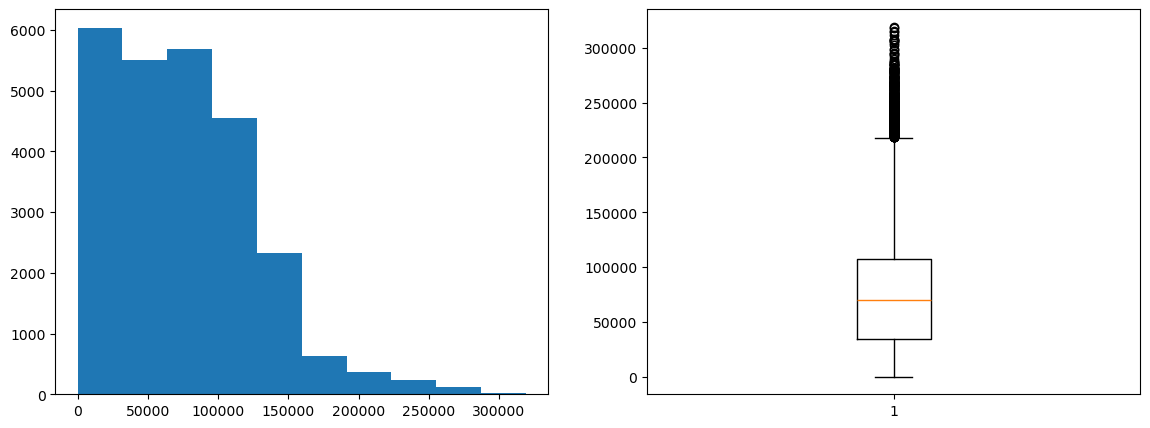

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are avaialble less than q1-1.5*IQR

- Outliers are avaialble greater than q3+1.5*IQR

- step1:
        - calculate Q1:25p
  - 

In [5]:
q1 = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
q3 = round(np.quantile(visa_df['prevailing_wage'],0.75),2)
IQR= q3 -q1
lb= q1-1.5*IQR
ub= q3+1.5*IQR
con1 = visa_df['prevailing_wage'] < lb
con2 = visa_df['prevailing_wage'] > ub
outliers_data = visa_df[con1 | con2]
len(outliers_data)

427

**non outliers **

In [6]:
q1 = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
q3 = round(np.quantile(visa_df['prevailing_wage'],0.75),2)
IQR= q3 -q1
lb= q1-1.5*IQR
ub= q3+1.5*IQR
con1 = visa_df['prevailing_wage'] > lb
con2 = visa_df['prevailing_wage'] < ub
non_outliers_data = visa_df[con1 & con2]
len(non_outliers_data)

25053

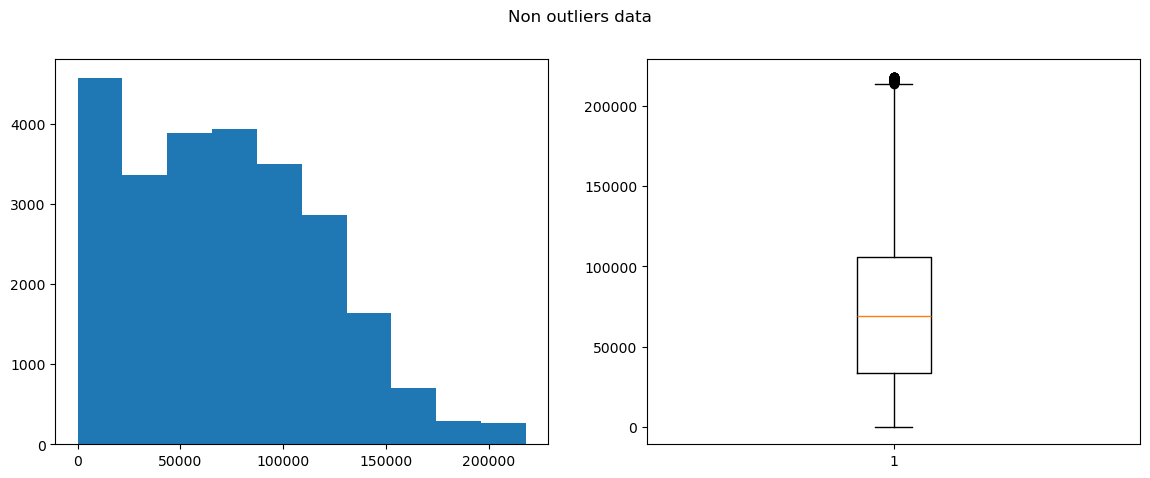

In [31]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

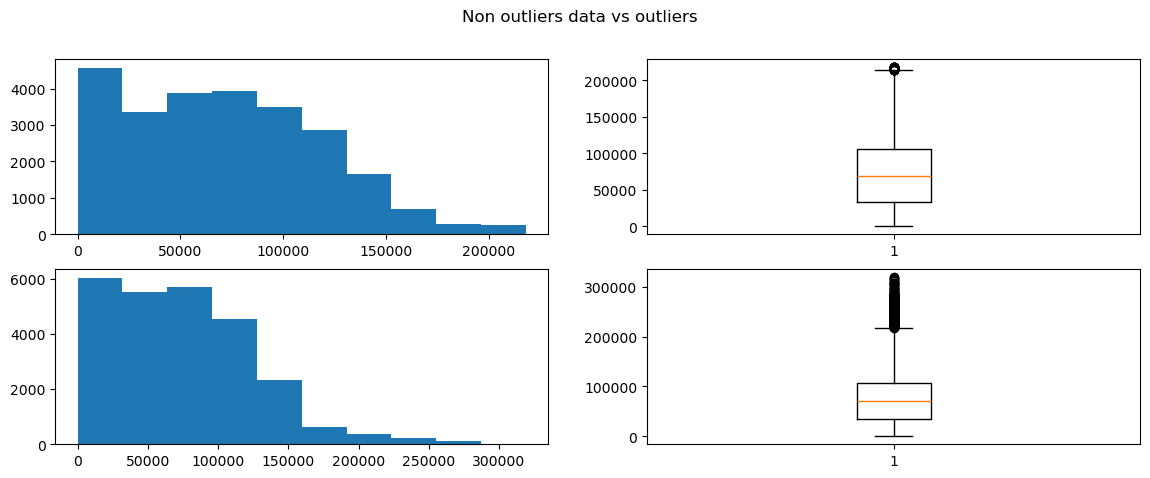

In [7]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data vs outliers')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

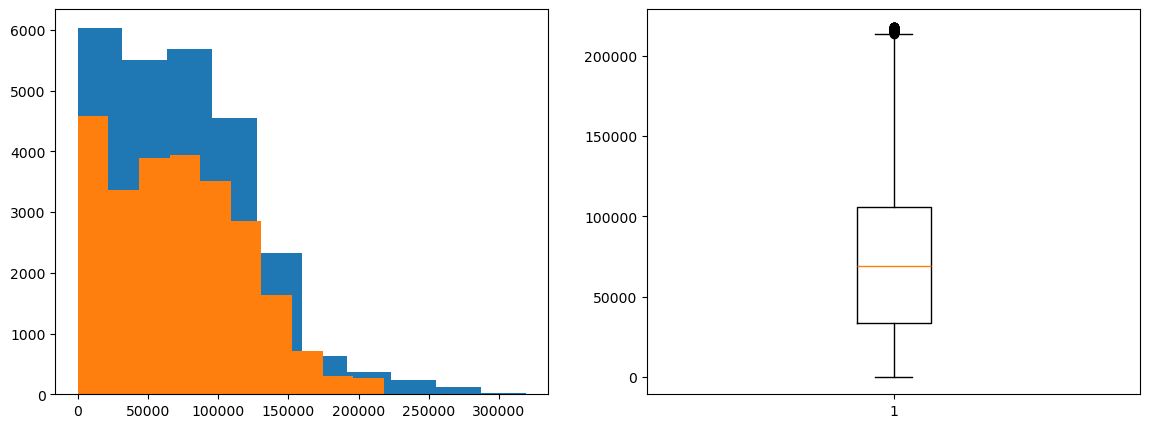

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**How to deal the outliers**

**method-1 :drop the outlier**

    - Drop the outliers is not a good idea

    - When you drop the outliers, data will loss

    - For example here we are droping 427 row

    - x% of 25480 = 427

    - it is 1.7% data, here it is fine we can drop the outlier

**Method-2:fill with median value**

-

In [ ]:
**fill with median**

- created a empty list

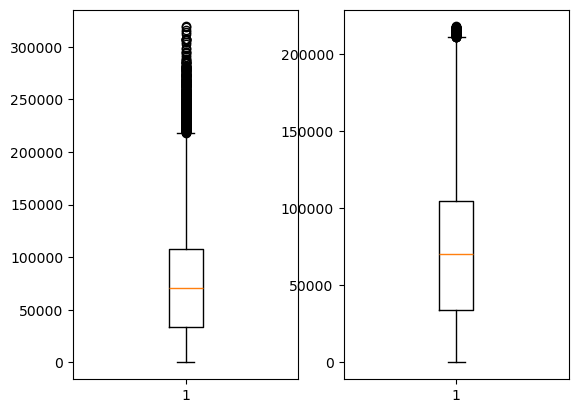

In [30]:
l1 = []
median=visa_df['prevailing_wage'].median()
q1 = round(np.quantile(visa_df['prevailing_wage'],0.25),2)
q3 = round(np.quantile(visa_df['prevailing_wage'],0.75),2)
IQR= q3 -q1
lb= q1-1.5*IQR
ub= q3+1.5*IQR
for value in visa_df['prevailing_wage'].values:
    if value < lb or value > ub:
        l1.append(median)
    else:
        l1.append(value)
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage']=l1
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

In [ ]:
**np.where**

- np.where will use for binary condition

- It has 3 arguments
    

In [8]:
d={"sub":["DS","ML","CS"],
  "Marks":[100,150,20]}
data=pd.DataFrame(d)

In [9]:
data

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [11]:
con= data['Marks']>100
l=np.where(con,1,data['Marks'])
l

array([100,   1,  20], dtype=int64)

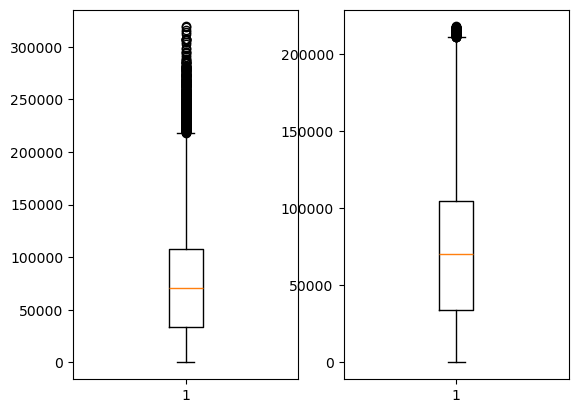

In [12]:
con1 = visa_df['prevailing_wage']<lb
con2 = visa_df['prevailing_wage']>ub
con = con1 | con2
median=visa_df['prevailing_wage'].median()
new_data = np.where(con,median,visa_df['prevailing_wage'])
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()